# Описание проекта:

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Задачи:
* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

  1) выделить целевые группы клиентов;
  
  2) предложить меры по снижению оттока;
  
  3) определить другие особенности взаимодействия с клиентами.


# Цель:

 Проанализировать отток клиентов фитнес-центров «Культурист-датасаентист»
 
# План проекта:

 Шаг 1. Загрузить данные
 
 Шаг 2. Провести исследовательский анализ данных (EDA)
 
 Шаг 3. Построить модель прогнозирования оттока клиентов
 
 Шаг 4. Сделайть кластеризацию клиентов
 
 Шаг 5. Сформулировать выводы и сделать базовые рекомендации по работе с клиентами

# Оглавление
# 1.[Шаг 1. Загрузим данные](#1) 
# 2.[Шаг 2. Проведем исследовательский анализ данных (EDA)](#2) 
# 3.[Шаг 3. Построим модель прогнозирования оттока клиентов](#3)
# 4.[Шаг 4. Сделаем кластеризацию клиентов](#4)
# 5.[Выводы](#5)

# Шаг 1. Загрузим данные<a id="1"></a>

In [1]:
# загрузим наши данные:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('/datasets/gym_churn.csv')

In [2]:
# Выведем часть DF:
data.sample(n=10,random_state=1)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
200,0,1,1,0,1,1,0,34,46.492200,1.0,0,1.010771,0.000000,1
1078,1,1,0,0,1,1,0,27,24.553945,1.0,4,1.390535,0.979445,1
610,1,1,1,1,1,6,1,31,85.671887,6.0,1,1.009510,0.730576,1
2159,1,0,1,0,1,1,0,26,75.803228,1.0,1,1.457390,1.540269,1
1169,0,0,0,0,1,1,0,31,410.756733,1.0,3,2.401838,2.473404,0
2448,0,0,0,0,1,12,1,28,106.110097,10.0,3,2.558573,2.520852,0
2938,1,1,0,0,0,1,0,23,199.155395,1.0,0,2.947225,2.701548,1
813,1,1,1,1,1,6,1,34,115.869242,4.0,9,0.652474,0.570673,0
1268,0,1,0,1,1,1,0,29,158.981864,1.0,2,1.775618,0.705410,1
870,0,1,0,0,1,1,1,32,67.587775,1.0,4,1.216622,1.333863,0


**Вывод:** загрузили данные и вывели случайные 10 строк из датасета

# Шаг 2. Проведем исследовательский анализ данных (EDA)<a id="2"></a>

**Посмотрим на датасет: есть ли в нем отсутствующие признаки, рассмотрим средние значения и стандартные отклонения и тд.**

In [3]:
# посмотрим краткую информацию о типах данных, столбцах и их содеражнии:
data.info()
data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


**Выводы:**
* Почти поровну мужчин и женщин;
* 84% клиентов живут/работают рядом с фитнес-центром;
* 49% клиентов являются сотрудником компании-партнёра клуба;
* 31% клиентов были приведены по акции "Приведи друга";
* 90% клиентов указали телефон;
* Средняя длительность текущего абонемента 4,68 месяцев. Медианное значение - 1 месяц;
* 41% клиентов посещалм групповые занятия;
* Средний возраст - 29 лет;
* В среднем фитнес-центр зарабатывает 146.9 с клиента;
* Среднее время до конца абонемента 4,32 месяца. Медианное значение - 1 месяц;
* В среднем клиенты с нами около 4 месяцев, медианное значение - 3 месяца;
* Средняя частота посещений в неделю за все время почти такая же как и за прошлый месяц, 1.77;
* Средняя частота посещений в неделю за прошлый месяц составляет 1.88;
* Переменные Age и Avg_additional_charges_total необходимо стандартизировать;
* **Среднее значение оттока - 27%**

**Проверим на наличие дублей и пропущенных значений**

In [4]:
# Проверим на наличие дубликатов:
data.duplicated().sum()

0

In [5]:
# Проверим на наличие пропущенных значений:
data.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [6]:
# Приведем название столбцев к нижнему регистру:
data.columns = [i.lower() for i in data]
data.columns.tolist()

['gender',
 'near_location',
 'partner',
 'promo_friends',
 'phone',
 'contract_period',
 'group_visits',
 'age',
 'avg_additional_charges_total',
 'month_to_end_contract',
 'lifetime',
 'avg_class_frequency_total',
 'avg_class_frequency_current_month',
 'churn']

**Вывод:** 
* дублей и пропущенных значений - нет;
* привели все столбцы к нижнему регистру.

**Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался**

In [7]:
# Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток (1) и тех, кто остался (0):
data.groupby('churn').agg('mean').transpose()

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


**Выводы:**
* Уходят поровну и мужчины и женщины;
* никак не влияет  наличие телефона, указанный возраст;
* средняя частота посещений в неделю за предыдущий месяц для людей в оттоке в 2 раза меньше;
* Уходят чаще те, кто:

   1) живет/работает дальше от фитнес-центра;
   
   2) не является сотрудником компании-партнёра клуба;
   
   3) имеет абонемент сроком 1-2 месяца;
   
   4) не посещают груповые занятия;
   
   5) пришли не по промо-акции.
   


In [8]:
# Разделим столбцы данных на бинарные и количественные признаки в списки:
bin_columns= ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']
quant_columns = ['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']

**Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)**

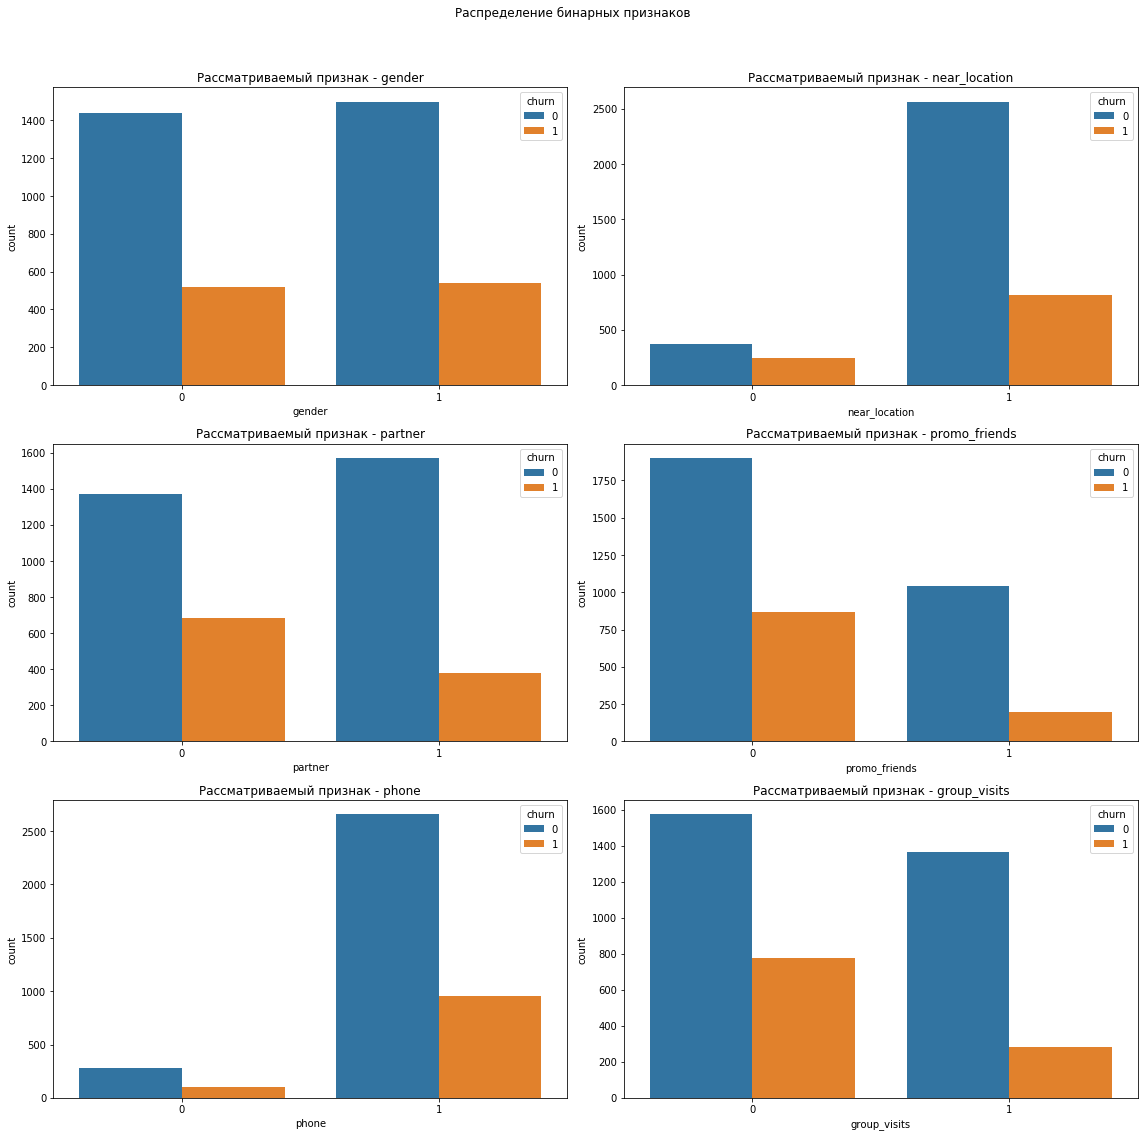

In [9]:
# Пострим гистограммы для каждого из бинарных признаков, сравним ушедших и оставшихся:

fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(16,15))
for idx, i in enumerate(bin_columns):
    sns.countplot(x = i, hue='churn', data=data, ax=ax[idx//2,idx%2])
    ax[idx// 2,idx % 2].set_title('Рассматриваемый признак - {}'.format(i))
    ax[idx// 2,idx % 2].set_xlabel(i)
    fig.suptitle('Распределение бинарных признаков', y=1.05)
    plt.tight_layout()
    

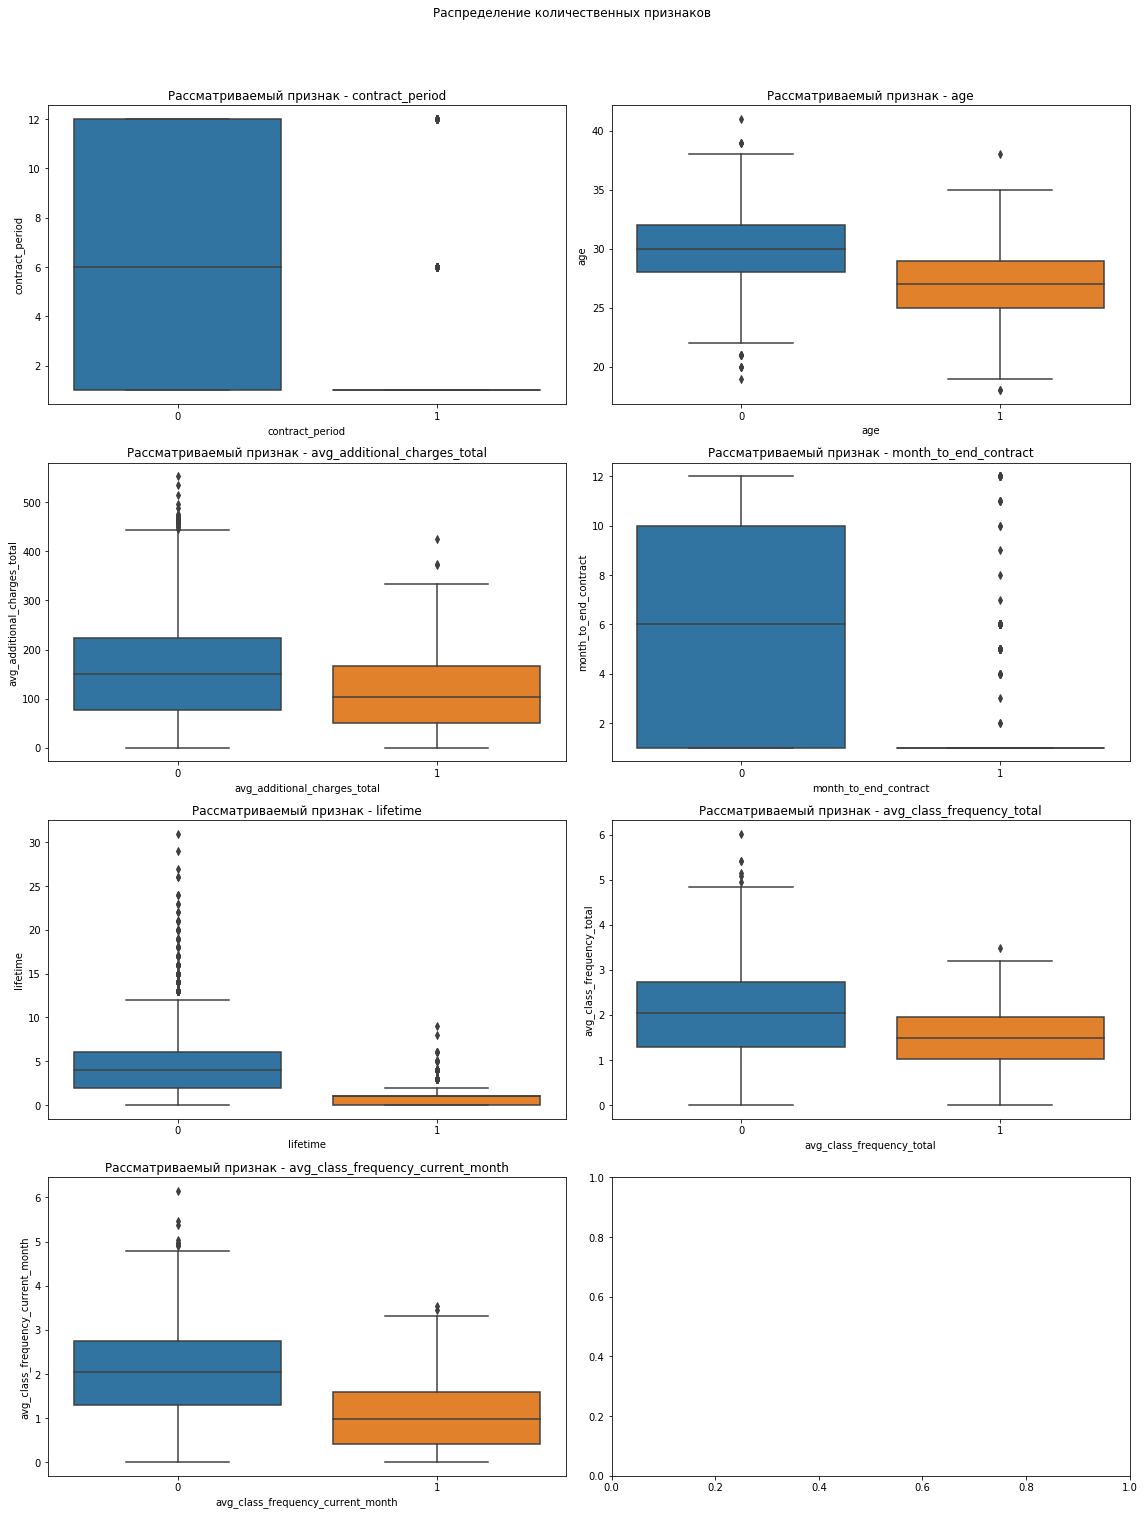

In [10]:
# Пострим "ящик с усами" для каждого из количественных признаков, сравним ушедших и оставшихся:
fig,ax = plt.subplots(nrows=4,ncols=2,figsize=(16,20))
for idx, i in enumerate(quant_columns):
    sns.boxplot(x = 'churn', y = i, data = data, ax=ax[idx//2,idx%2])
    ax[idx// 2,idx % 2].set_title('Рассматриваемый признак - {}'.format(i))
    ax[idx// 2,idx % 2].set_xlabel(i)
    fig.suptitle('Распределение количественных признаков', y=1.05)
    plt.tight_layout()
    

In [11]:
# Построим таблицу корреляции признаков:
display(data.corr())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


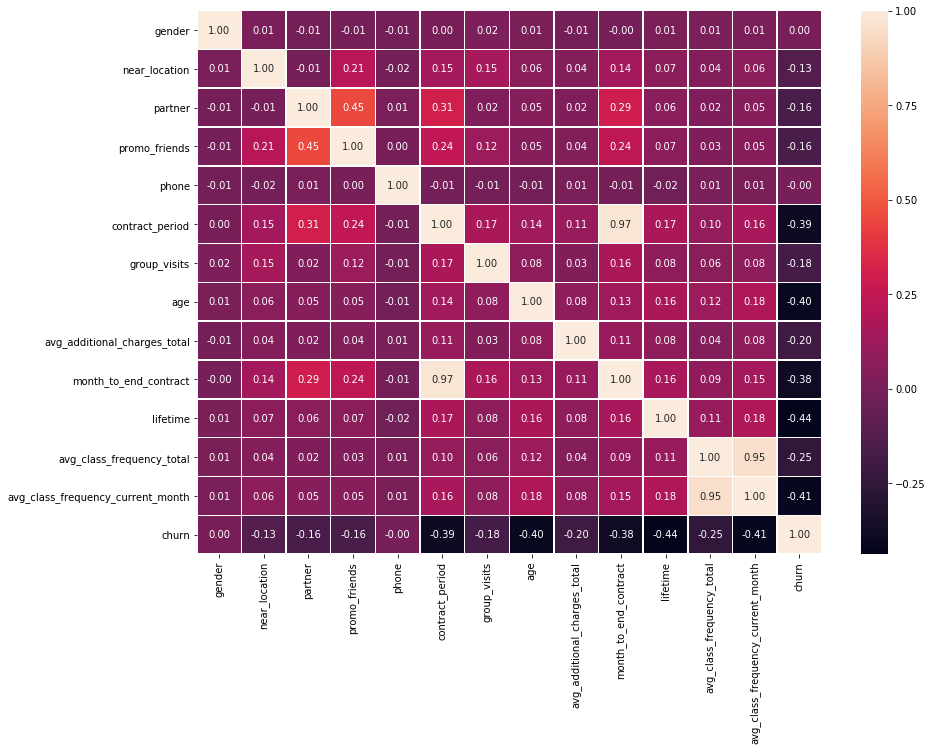

In [12]:
# Построим матрицу корреляции признаков с помощью heatmap:
plt.figure(figsize=(14, 10))
sns.heatmap( data.corr(), annot = True, fmt = '0.2f', linewidths=.5)
plt.show()

* Явной зависимости факта оттока от каких-либо признаков нет;
* Сильно коррелируют:

1) 'contract_period' и 'month_to_end_contract';

2) 'avg_class_frequency_current_month' и 'avg_class_frequency_total'.

Чтобы избавиться от мультиколлинеарности, удалим из датафрейма один из каждой пары.

In [13]:
data.drop('month_to_end_contract', axis = 1, inplace = True)
data.drop('avg_class_frequency_total', axis = 1, inplace = True)

# Шаг 3. Построим модель прогнозирования оттока клиентов<a id="3"></a>


**Построим модель бинарной классификации пользователей, где целевой признак - факт оттока пользователя в следующем месяце.**

**Этапы:**
1) Разобъем данные на обучающую и валидационную выборки функцией train_test_split();

2) Обучим модель на train-выборке логистической регрессией и случайным лесом;

3) Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели и сделаем выводы.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

In [15]:
# посмотрим, как соотносятся классы набора данных:
print('Соотношение классов:\n', data['churn'].value_counts())

Соотношение классов:
 0    2939
1    1061
Name: churn, dtype: int64


In [16]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y):
X = data.drop('churn', axis = 1)
y = data['churn']

In [17]:
# разделяем модель на обучающую и валидационную выборку:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

In [18]:
# обучим StandartScaler на обучающей выборке:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
# Преобразуем обучающий и валидационные наборы данных:
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [20]:
#Задаем алгоритм для модели:
lr_model = LogisticRegression(solver='liblinear',random_state=0)

In [21]:
# Обучим модель:
lr_model.fit(X_train_st, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
# Воспользуемся уже обученной моделью, чтобы сделать прогнозы:
lr_predictions = lr_model.predict(X_test_st)

In [23]:
# Выведем веса и нулевой коэффициент:
print(lr_model.coef_) 
print(lr_model.intercept_) 

[[ 0.02435228 -0.06325383 -0.05799998 -0.15007384 -0.07493617 -1.37710805
  -0.37541984 -1.15510683 -0.56168546 -3.5486095  -1.27180585]]
[-3.6900244]


In [24]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса:
rf_model = RandomForestClassifier(n_estimators = 100,random_state = 0)

In [25]:
# обучим модель случайного леса
rf_model.fit(X_train_st,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [26]:
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions =  rf_model.predict(X_test_st)

In [27]:
#  Создадим функцию для вывода результатов:
def print_all_metrics(y_true, y_pred, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.3f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.3f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.3f}'.format(recall_score(y_true, y_pred)))

In [28]:
# выведем все метрики для логистическрй регрессии:
print_all_metrics(
    y_test,
    lr_predictions,
    title='Метрики для модели логистической регрессии:'
)

Метрики для модели логистической регрессии:
	Accuracy: 0.917
	Precision: 0.848
	Recall: 0.840


In [29]:
# выведем все метрики для случайного леса:
print_all_metrics(
    y_test,
    rf_predictions,
    title = 'Метрики для модели случайного леса:'
)

Метрики для модели случайного леса:
	Accuracy: 0.905
	Precision: 0.854
	Recall: 0.774


**Вывод:**
* доля верно угаданных ответов из всех прогнозов (Accuracy) у модели логистическая регресия (0.92) оказалась лучше чем у случайного леса (0.91);
* доля правильных ответов только среди целевого класса (precision) у модели логистическая регресия (0.85) оказалась одинаковым со случайным леса (0.85); 
* сколько реальных объектов смогли обнаружить с помощью модели (recall) у модели логистическая регресия (0.84) оказалась лучше чем у случайного леса (0.77);
* Выбираем в итоге модель - Логистическая регрессия, т.к. большенство метрик оказались лучше.

# Шаг 4. Сделаем кластеризацию клиентов<a id="4"></a>

**Проведем кластеризацию пользователей (обучение без учителя)**

**Этапы:**
1) Стандартизируем данные;

2) Построим матрицу расстояний функцией linkage() на стандартизированной матрице признаков и нарисуем дендограмму.

3) Обучим модель кластеризации на основе алгоритма K-Means и спрогнозируем кластеры клиентов. (берём n=5 кластеров)


In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [31]:
# обязательная стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward') 

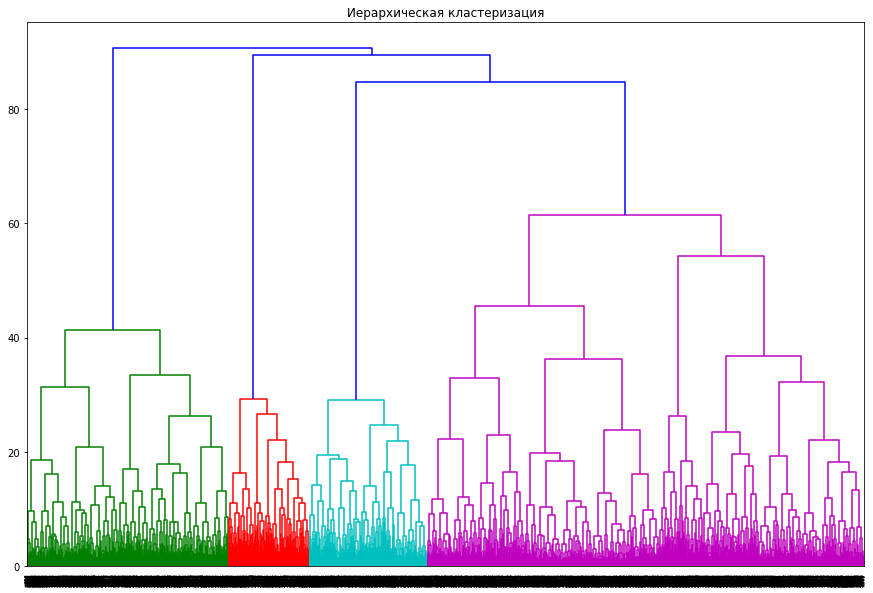

In [32]:
# Построим дендрограмму:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация')
plt.show() 

**Выводы:**
* явно выделяются 4 кластера, но возьмем 5;

In [33]:
# задаём модель k_means с числом кластеров 5:
km = KMeans(n_clusters = 5,random_state = 0)

In [34]:
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4):
labels = km.fit_predict(X_sc)

In [35]:
# сохраняем метки кластера в поле нашего датасетаЖ=:
data['cluster_km'] = labels

In [36]:
# Выведеем объем каждого кластера:
data['cluster_km'].value_counts()

2    1064
3    1007
0     985
1     558
4     386
Name: cluster_km, dtype: int64

In [37]:
# Сгрупируем по кластерам и найдем среднее значения каждого признака:
data.groupby('cluster_km').agg('mean').transpose()

cluster_km,0,1,2,3,4
gender,0.496447,0.500000,0.500940,0.534260,0.523316
near_location,0.995939,0.000000,1.000000,0.996028,0.862694
partner,0.892386,0.489247,0.217105,0.379345,0.471503
promo_friends,1.000000,0.078853,0.072368,0.009930,0.305699
phone,1.000000,1.000000,1.000000,1.000000,0.000000
contract_period,6.922843,2.994624,2.010338,6.208540,4.777202
group_visits,0.524873,0.232975,0.277256,0.538232,0.427461
age,29.606091,28.679211,27.583647,30.699106,29.297927
avg_additional_charges_total,153.424651,137.125763,119.339956,176.259567,144.208179
lifetime,4.283249,2.974910,1.922932,5.415094,3.940415


**Выводы:**

**Кластер 0**
* Отток - 11%;
* Живут или работают недалеко от фитнес-центра;
* 89% являются сотрудниками компании-партнёра клуба;
* По промо-акции пришли все 100%;
* Заключают договора на длительный срок - более 6 месяцев;
* 52% посещают групповые занятия.

**Кластер 1** 
* Отток - 40%;
* живут или работают в другом районе;
* 48% являются сотрудниками компании-партнёра клуба;
* По промо-акции пришли лишь 7%;
* 23% посещают групповые занятия.

**Кластер 2**
* Отток - 56% - самый высокий;
* Все живут или работают недалеко от фитнес-центра;
* В основном имеют короткие абонементы  на 1-2 месяца;
* Наименьшее средняя частота посещений в неделю за предыдущий месяц;
* Лишь 21% являются сотрудниками компании-партнёра клуба;
* По промо-акции пришли лишь 7%;
* 27% ходят на групповые занятия.

**Кластер 3**
* Отток - 1% - самый низкий;
* Живут или работают недалеко от фитнес-центра;
* 38% являются сотрудниками компании-партнёра клуба;
* Заключают договора на длительный срок - более 6 месяцев;
* 53% посещают групповые занятия;
* Реже всех пришли по промо акции ;
* в среднем потратили больше всех денежных средств 176;
* средняя частота посещений в неделю за предыдущий месяц выше всех;
* время с момента первого обращения в фитнес-центр (в месяцах) больше всех - 5.4 мес.

**Кластер 4** 
* Отток - 26%;
* 86% Живут или работают недалеко от фитнес-центра;
* Нет мобильного номера;
* 47% являются сотрудниками компании-партнёра клуба;
* По промо-акции пришли 30%;
* абонементы  на 3-6 месяца;
* 42% посещают групповые занятия.

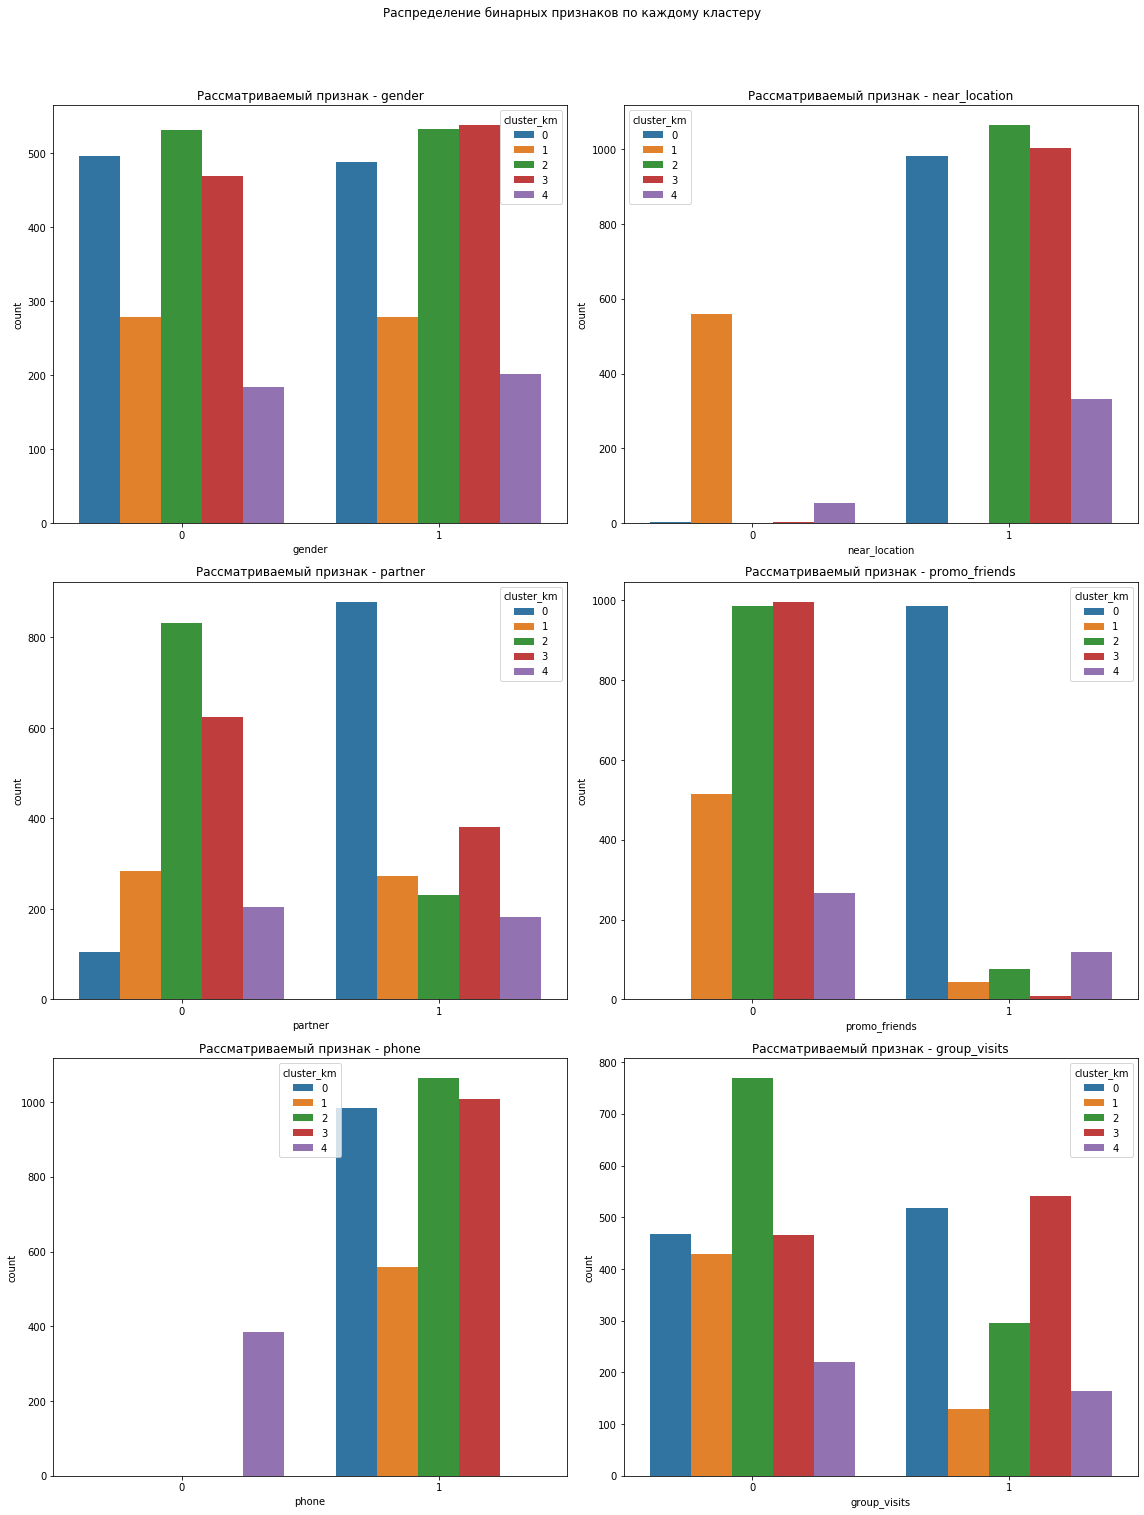

In [38]:
# Пострим гистограммы по каждому класетеру для каждого из бинарных признаков:
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(16,20))
for idx, i in enumerate(bin_columns):
    sns.countplot(x = i, hue='cluster_km', data=data, ax=ax[idx//2,idx%2])
    ax[idx// 2,idx % 2].set_title('Рассматриваемый признак - {}'.format(i))
    ax[idx// 2,idx % 2].set_xlabel(i)
    fig.suptitle('Распределение бинарных признаков по каждому кластеру', y=1.05)
    plt.tight_layout()

In [39]:
# Обновим значение удалив мультиколлинеарные признаки:
quant_columns = ['contract_period', 'age', 'avg_additional_charges_total',  'lifetime',  'avg_class_frequency_current_month']

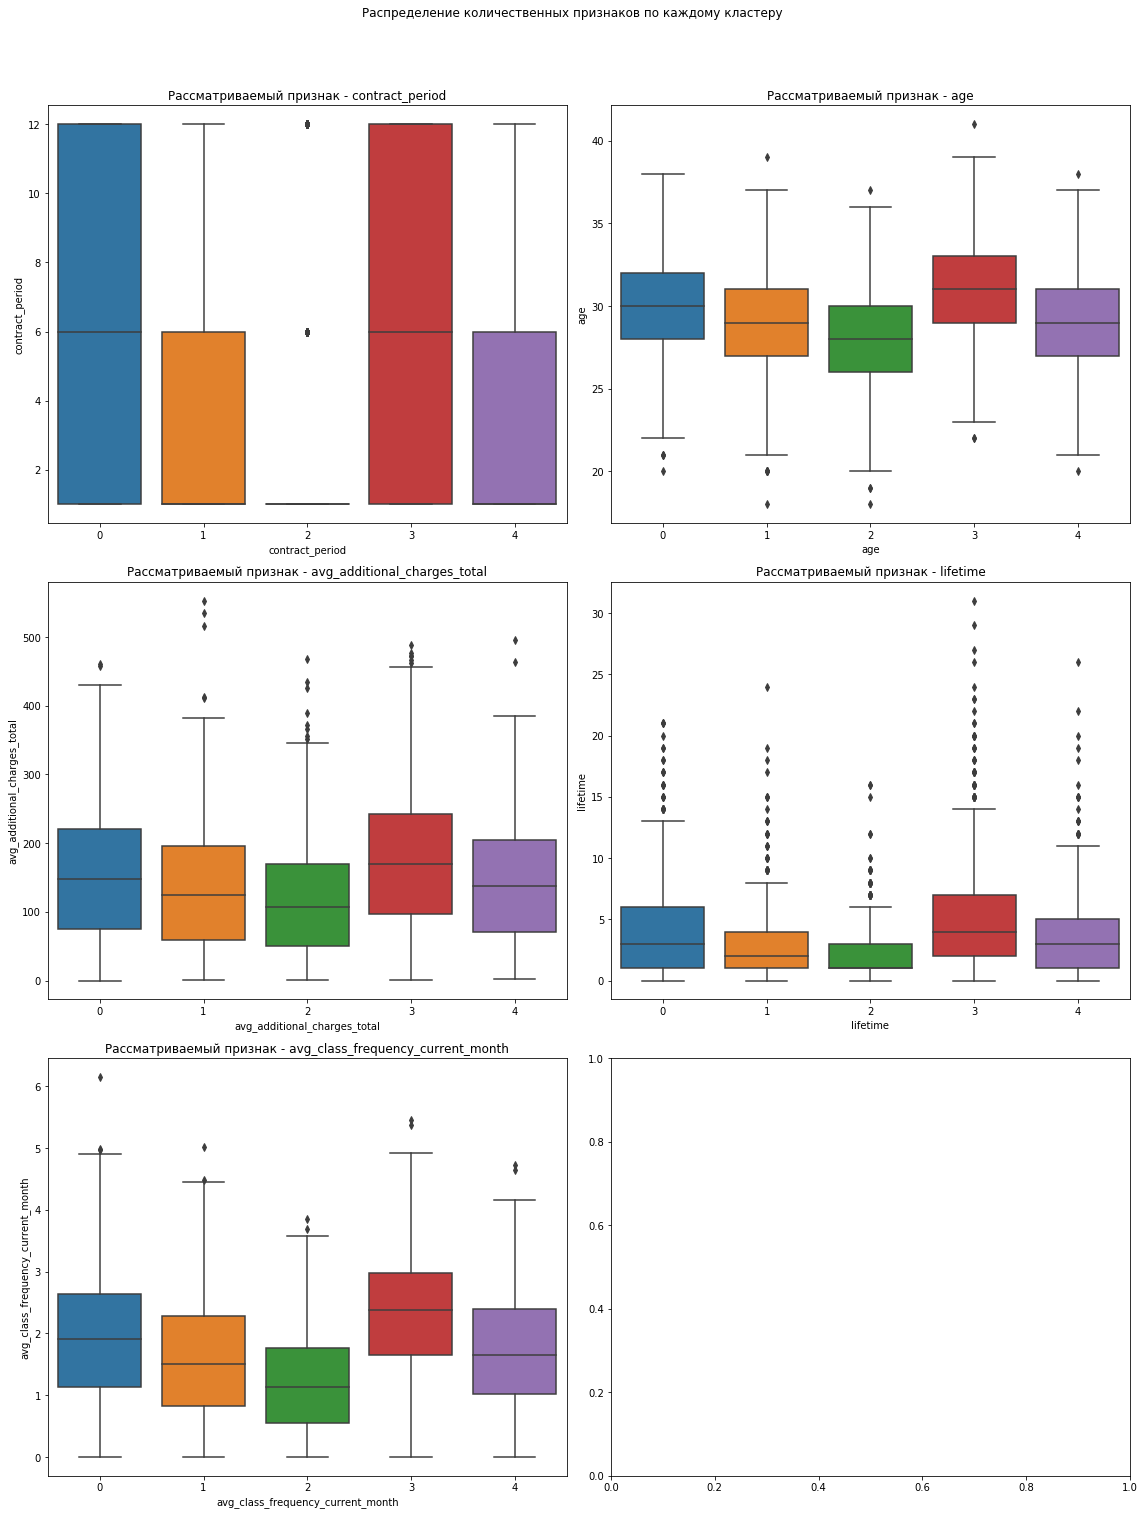

In [40]:
# Пострим "ящик с усами" по каждому кластеру для каждого из количественных признаков:
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(16,20))
for idx, i in enumerate (quant_columns):
    sns.boxplot(x = 'cluster_km', y = i, data = data, ax=ax[idx//2,idx%2])
    ax[idx// 2,idx % 2].set_title('Рассматриваемый признак - {}'.format(i))
    ax[idx// 2,idx % 2].set_xlabel(i)
    fig.suptitle('Распределение количественных признаков по каждому кластеру', y=1.05)
    plt.tight_layout()

# Шаг 5. Сформулируем выводы и сделаем базовые рекомендации по работе с клиентами<a id="5"></a>

**1.** Цель проекта: проанализировать отток клиентов фитнес-центров «Культурист-датасаентист».


**2.** Исходные данные: «Культурист-датасаентист» предоставил сведения в csv-файлах, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:
   * **'Churn'** — факт оттока в текущем месяц
   * **'gender'** — пол;
   * **'Near_Location'** — проживание или работа в районе, где находится фитнес-центр;
   * **'Partner'** — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
   * **'Promo_friends'** — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
   * **'Phone'** — наличие контактного телефона;
   * **'Age'** — возраст;
   * **'Lifetime'** — время с момента первого обращения в фитнес-центр (в месяцах);
   * **'Contract_period'** — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
   * **'Month_to_end_contract'** — срок до окончания текущего действующего абонемента (в месяцах);
   * **'Group_visits'** — факт посещения групповых занятий;
   * **'Avg_class_frequency_total'** — средняя частота посещений в неделю за все время с начала действия абонемента; 
   * **'Avg_class_frequency_current_month'** — средняя частота посещений в неделю за предыдущий месяц;
   * **'Avg_additional_charges_total'** — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.
   
   
**3.** Исходные данные были достаточно чистыми, дополнительной обработки артефактов не понадобилось. Проверки проводились с целью выявить дубликаты и пропущенные значения. Привели только значения к нижнему регистру для  удобства дальнейшей обработки.


**4.** Выводы по имеющимся данным:
   * Почти поровну мужчин и женщин;
   * 84% клиентов живут/работают рядом с фитнес-центром;
   * 49% клиентов являются сотрудником компании-партнёра клуба;
   * 31% клиентов были приведены по акции "Приведи друга";
   * 90% клиентов указали телефон;
   * Средняя длительность текущего абонемента 4,68 месяцев. Медианное значение - 1 месяц;
   * 41% клиентов посещалм групповые занятия;
   * Средний возраст - 29 лет;
   * В среднем фитнес-центр зарабатывает 146.9 с клиента;
   * Среднее время до конца абонемента 4,32 месяца. Медианное значение - 1 месяц;
   * В среднем клиенты с нами около 4 месяцев, медианное значение - 3 месяца;
   * Средняя частота посещений в неделю за все время почти такая же как и за прошлый месяц, 1.77.
   * Средняя частота посещений в неделю за прошлый месяц составляет 1.88
   * **Среднее значение оттока - 27%**
   
**5.**  Выводы на основе отличий признаков у клиентов, попавших в отток и оставшихся:
   * Уходят поровну и мужчины и женщины;
   * никак не влияет наличие телефона, указанный возраст;
   * средняя частота посещений в неделю за предыдущий месяц для людей в оттоке в 2 раза меньше;
   * чаще в отток кто, живет/работает дальше от фитнес-центра;
   * чаще в отток кто, не является сотрудником компании-партнёра клуба;
   * чаще в отток кто, имеет абонемент сроком 1-2 месяца;
   * чаще в отток кто,не посещают груповые занятия;
   * чаще в отток кто, пришли не по промо-акции.
   
**6.** Построили модели обучение с учителем (Логистическая регресия) и обучение без учителя (Случайный лес):
* доля верно угаданных ответов из всех прогнозов (Accuracy) у модели логистическая регресия (0.92) оказалась **лучше** чем у случайного леса (0.91);
* доля правильных ответов только среди целевого класса (precision) у модели логистическая регресия (0.85) оказалась одинаковым со случайным леса (0.85); 
* сколько реальных объектов смогли обнаружить с помощью модели (recall) у модели логистическая регресия (0.84) оказалась **лучше** чем у случайного леса (0.77);
* Выбираем в итоге модель - Логистическая регрессия, т.к. большенство метрик оказались лучше.

**7.** Разбили клиентов на 5 кластеров:


**Кластер 0**
* Отток - 11%;
* Живут или работают недалеко от фитнес-центра;
* 89% являются сотрудниками компании-партнёра клуба;
* **По промо-акции пришли все 100%;**
* Заключают договора на длительный срок - более 6 месяцев;
* 52% посещают групповые занятия.

**Кластер 1** 
* Отток - 40%;
* живут или работают в другом районе;
* 48% являются сотрудниками компании-партнёра клуба;
* По промо-акции пришли лишь 7%;
* 23% посещают групповые занятия.

**Кластер 2**
* **Отток - 56% - самый высокий;**
* Все живут или работают недалеко от фитнес-центра;
* В основном имеют короткие абонементы  на 1-2 месяца;
* Наименьшее средняя частота посещений в неделю за предыдущий месяц;
* Лишь 21% являются сотрудниками компании-партнёра клуба;
* По промо-акции пришли лишь 7%;
* 27% ходят на групповые занятия.

**Кластер 3**
* **Отток - 1% - самый низкий;**
* Живут или работают недалеко от фитнес-центра;
* 38% являются сотрудниками компании-партнёра клуба;
* Заключают договора на длительный срок - более 6 месяцев;
* 53% посещают групповые занятия;
* Реже всех пришли по промо акции ;
* в среднем потратили больше всех денежных средств 176;
* **средняя частота посещений в неделю за предыдущий месяц выше всех;**
* время с момента первого обращения в фитнес-центр (в месяцах) больше всех - 5.4 мес.

**Кластер 4** 
* Отток - 26%;
* 86% Живут или работают недалеко от фитнес-центра;
* **Нет мобильного номера;**
* 47% являются сотрудниками компании-партнёра клуба;
* По промо-акции пришли 30%;
* абонементы  на 3-6 месяца;
* 42% посещают групповые занятия.

**Рекомендации:**
* Стимулировать на покупку более длительных абонементов и на активное участие в групповых занятиях;
* Расширять сеть партнеров, для привлечения лояльных сотрудников партнеров;
* Промо-акцию приведи друга считать успешной и далее продвигать активнее - люди любят ходить не в одиночку;
* Не тратить рекламный бюджет для клиентов живущих или работающих в других районах.